In [1]:
#1.  First, let's make all the necessary imports:
#Importing packages and libraries.
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#2.  We now define a deterministic nonlinear function underlying our generative model:
#Creating a function that takes the exponent of a number and returning it to the system.
def f(x):
    return np.exp(3 * x)

In [3]:
#3.  We generate the values along the curve on [0,2].
#Generating values.
x_tr = np.linspace(0., 2, 200)
y_tr = f(x_tr)

In [4]:
#4.  Now, let's generate data points within [0,1]. We use the function f and we add some Gaussian noise
#Creating an array and assigning it to a variable.
x = np.array([0, .1, .2, .5, .8, .9, 1])
#Using functions operators and multiplying them by the length of a random legnth of the variable.
y = f(x) + 2 * np.random.randn(len(x))

Text(0.5, 1.0, 'Generative model')

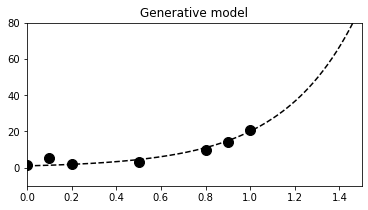

In [5]:
#5.  Let's plot our data points on [0,1].
#Making some subplots.
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
#Plotting points.
ax.plot(x_tr, y_tr, '--k')
ax.plot(x, y, 'ok', ms=10)
#Setting an xlimit.
ax.set_xlim(0, 1.5)
#Setting a ylimit.
ax.set_ylim(-10, 80)
#Adding a title.
ax.set_title('Generative model')

In [6]:
#6.  Now, we use scikit-learn to fit a linear model to the data. There are three steps. First, we create the model (an instance of the LinearRegression class). Then, we fit the model to our data. Finally, we predict values from our trained model.
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y)
# Now, we predict points with our trained model.
y_lr = lr.predict(x_tr[:, np.newaxis])

Text(0.5, 1.0, 'Linear regression')

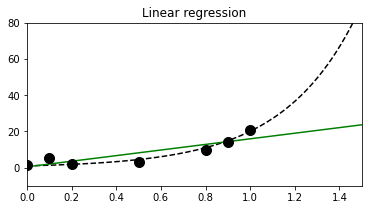

In [7]:
#7.  We now plot the result of the trained linear model. We obtain a regression line in green here.
#Plotting data.
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
#Plotting points.
ax.plot(x_tr, y_tr, '--k')
ax.plot(x_tr, y_lr, 'g')
ax.plot(x, y, 'ok', ms=10)
#Setting an x limit.
ax.set_xlim(0, 1.5)
#Setting a y limit.
ax.set_ylim(-10, 80)
#Setting a title.
ax.set_title("Linear regression")

Coefficients, degree 2:
	 33.59 -18.13 0.00
Coefficients, degree 5:
	 780.75 -2011.89 1846.19 -677.56 81.83 0.00


Text(0.5, 1.0, 'Linear regression')

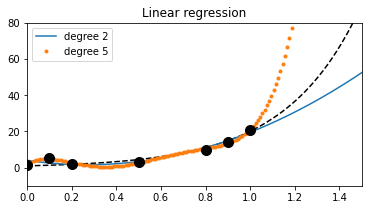

In [8]:
#8.  The linear fit is not well-adapted here, as the data points are generated according to a nonlinear model (an exponential curve). Therefore, we are now going to fit a nonlinear model. More precisely, we will fit a polynomial function to our data points. We can still use linear regression for this, by precomputing the exponents of our data points. This is done by generating a Vandermonde matrix, using the np.vander() function. We will explain this trick in How it works.... In the following code, we perform and plot the fit:
lrp = lm.LinearRegression()
#Making sub plots.
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
#Plotting points.
ax.plot(x_tr, y_tr, '--k')
#Using a for loop to zip predictions.
for deg, s in zip([2, 5], ['-', '.']):
    lrp.fit(np.vander(x, deg + 1), y)
    #Predict enables us to predict the labels of the data values on the basis of the trained model.
    y_lrp = lrp.predict(np.vander(x_tr, deg + 1))
    #Plotting points.
    ax.plot(x_tr, y_lrp, s,
            label=f'degree {deg}')
    #Setting the legend location.
    ax.legend(loc=2)
    #Setting the x limit.
    ax.set_xlim(0, 1.5)
    #Setting the y limit.
    ax.set_ylim(-10, 80)
    # Print the model's coefficients.
    print(f'Coefficients, degree {deg}:\n\t',
          ' '.join(f'{c:.2f}' for c in lrp.coef_))
#Plotting some points.
ax.plot(x, y, 'ok', ms=10)
#Setting a title for our plot.
ax.set_title("Linear regression") 

Coefficients, degree 2: 12.77 2.45 0.00
Coefficients, degree 5: 5.97 5.25 4.08 2.12 -0.12 0.00


Text(0.5, 1.0, 'Ridge regression')

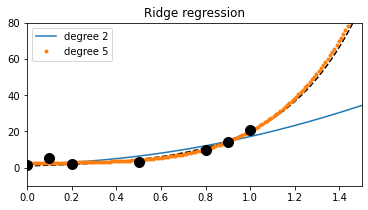

In [9]:
#9.  We will now use a different learning model called ridge regression. It works like linear regression except that it prevents the polynomial's coefficients from becoming too big. This is what happened in the previous example. By adding a regularization term in the loss function, ridge regression imposes some structure on the underlying model. We will see more details in the next section.
#Using Ridge cross validation.
ridge = lm.RidgeCV()
#Creating subplots.
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
#Plotting the points.
ax.plot(x_tr, y_tr, '--k')
#A for loop to make predictions in the zipp and set coordinates and limits everything.
for deg, s in zip([2, 5], ['-', '.']):
    ridge.fit(np.vander(x, deg + 1), y)
    #Predict enables us to predict the labels of the data values on the basis of the trained model.
    y_ridge = ridge.predict(np.vander(x_tr, deg + 1))
    ax.plot(x_tr, y_ridge, s,
            label='degree ' + str(deg))
    #Creating a legend.
    ax.legend(loc=2)
    #Setting x limit.
    ax.set_xlim(0, 1.5)
    #Setting x limit.
    ax.set_ylim(-10, 80)
    # Print the model's coefficients.
    print(f'Coefficients, degree {deg}:',
          #Joining coefficients.
          ' '.join(f'{c:.2f}' for c in ridge.coef_))
#Plotting points.
ax.plot(x, y, 'ok', ms=10)
#Setting a title.
ax.set_title("Ridge regression")